In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

# Add the directory containing the Python file to the `sys.path` list
sys.path.append("/IMP DOCUMENT/College material/SEM6/AIProject/Ozone-Prediction-AIProject/Support")

# Import the Python file
import LSTM_Model
import TsPreProcessing

In [3]:
data = pd.read_excel('AnandVihar_CombinedData.xlsx', sheet_name='Sheet1')
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,RF,TOT-RF
0,01-04-2015 00:00,02-04-2015 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
1,02-04-2015 00:00,03-04-2015 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2,03-04-2015 00:00,04-04-2015 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
3,04-04-2015 00:00,05-04-2015 00:00,53.96,166.93,18.27,55.11,70.93,25.78,30.99,1.61,25.63,2.04,10.27,59.87,131.07,256.38,740,23.28,None,0.0
4,05-04-2015 00:00,06-04-2015 00:00,100.82,260.41,15.91,50.65,62.23,32.94,47.61,1.42,23.2,4.39,10.6,69.64,124.15,174.72,740,20.74,None,0.0


In [4]:
data2 = pd.read_excel('AnandVihar_2021-23.xlsx', sheet_name='Sheet1')
data2.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Toluene,Temp,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-01-2021 00:00,02-01-2021 00:00,465.44,507.46,203.55,97.6,232.22,59.12,25.14,4.57,...,105.52,None,80.61,0.44,165.53,118.24,972.25,13.14,None,0
1,02-01-2021 00:00,03-01-2021 00:00,312.56,398.5,52.81,90.35,91.09,54.05,34.86,3.04,...,53.03,None,68.23,0.57,131.42,96.69,972.21,15.61,None,0
2,03-01-2021 00:00,04-01-2021 00:00,147.15,None,33.34,60.04,59.11,58.55,22.09,2.1,...,35.15,None,84.3,0.66,127.36,60.64,971.94,15.71,None,0
3,04-01-2021 00:00,05-01-2021 00:00,111.79,None,94.99,73.46,116.5,56.55,19.84,2.32,...,54.58,None,86.66,0.42,187.16,122.27,972.51,17.71,None,0
4,05-01-2021 00:00,06-01-2021 00:00,85.35,None,67.87,56.34,85.27,51.5,29.44,2.04,...,32.21,None,81.4,0.36,152.29,126.18,973.61,18.23,None,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  2102 non-null   object 
 1   To Date    2102 non-null   object 
 2   PM2.5      2102 non-null   object 
 3   PM10       2102 non-null   object 
 4   NO         2102 non-null   object 
 5   NO2        2102 non-null   object 
 6   NOx        2102 non-null   object 
 7   NH3        2102 non-null   object 
 8   SO2        2102 non-null   object 
 9   CO         2102 non-null   object 
 10  Ozone      2102 non-null   object 
 11  Benzene    2102 non-null   object 
 12  Toluene    2102 non-null   object 
 13  RH         2102 non-null   object 
 14  WD         2102 non-null   object 
 15  SR         2102 non-null   object 
 16  BP         2102 non-null   object 
 17  AT         2102 non-null   object 
 18  RF         2102 non-null   object 
 19  TOT-RF     2102 non-null   float64
dtypes: float

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  848 non-null    object
 1   To Date    848 non-null    object
 2   PM2.5      848 non-null    object
 3   PM10       848 non-null    object
 4   NO         848 non-null    object
 5   NO2        848 non-null    object
 6   NOx        848 non-null    object
 7   NH3        848 non-null    object
 8   SO2        848 non-null    object
 9   CO         848 non-null    object
 10  Ozone      848 non-null    object
 11  Benzene    848 non-null    object
 12  Toluene    848 non-null    object
 13  Temp       848 non-null    object
 14  RH         848 non-null    object
 15  WS         848 non-null    object
 16  WD         848 non-null    object
 17  SR         848 non-null    object
 18  BP         848 non-null    object
 19  AT         848 non-null    object
 20  RF         848 non-null    objec

In [7]:
# give a list of column not in data from data2
not_common_cols = data2.columns.difference(data.columns)
not_common_cols

Index(['Temp', 'WS'], dtype='object')

In [8]:
data2.drop(not_common_cols, axis=1, inplace=True)
data2.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,RF,TOT-RF
0,01-01-2021 00:00,02-01-2021 00:00,465.44,507.46,203.55,97.6,232.22,59.12,25.14,4.57,38.86,8.9,105.52,80.61,165.53,118.24,972.25,13.14,None,0
1,02-01-2021 00:00,03-01-2021 00:00,312.56,398.5,52.81,90.35,91.09,54.05,34.86,3.04,28.77,10.15,53.03,68.23,131.42,96.69,972.21,15.61,None,0
2,03-01-2021 00:00,04-01-2021 00:00,147.15,None,33.34,60.04,59.11,58.55,22.09,2.1,27.63,4.91,35.15,84.3,127.36,60.64,971.94,15.71,None,0
3,04-01-2021 00:00,05-01-2021 00:00,111.79,None,94.99,73.46,116.5,56.55,19.84,2.32,29.29,5.95,54.58,86.66,187.16,122.27,972.51,17.71,None,0
4,05-01-2021 00:00,06-01-2021 00:00,85.35,None,67.87,56.34,85.27,51.5,29.44,2.04,32.29,2.14,32.21,81.4,152.29,126.18,973.61,18.23,None,0


In [9]:
final_data = pd.concat([data, data2], axis=0)
final_data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,RF,TOT-RF
0,01-04-2015 00:00,02-04-2015 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
1,02-04-2015 00:00,03-04-2015 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2,03-04-2015 00:00,04-04-2015 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
3,04-04-2015 00:00,05-04-2015 00:00,53.96,166.93,18.27,55.11,70.93,25.78,30.99,1.61,25.63,2.04,10.27,59.87,131.07,256.38,740,23.28,None,0.0
4,05-04-2015 00:00,06-04-2015 00:00,100.82,260.41,15.91,50.65,62.23,32.94,47.61,1.42,23.2,4.39,10.6,69.64,124.15,174.72,740,20.74,None,0.0


In [10]:
# Convert the date column to datetime
from datetime import datetime
df = final_data.copy()
# datae
df['From Date'] = df['From Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['To Date'] = df['To Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['From Date'].min(), df['From Date'].max()
df = df.set_index('To Date')
df.drop(['From Date'], axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,RF,TOT-RF
To Date,,,,,,,,,,,,,,,,,,
2015-04-02,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2015-04-03,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2015-04-04,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2015-04-05,53.96,166.93,18.27,55.11,70.93,25.78,30.99,1.61,25.63,2.04,10.27,59.87,131.07,256.38,740,23.28,None,0.0
2015-04-06,100.82,260.41,15.91,50.65,62.23,32.94,47.61,1.42,23.2,4.39,10.6,69.64,124.15,174.72,740,20.74,None,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2950 entries, 2015-04-02 to 2023-04-28
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    2950 non-null   object 
 1   PM10     2950 non-null   object 
 2   NO       2950 non-null   object 
 3   NO2      2950 non-null   object 
 4   NOx      2950 non-null   object 
 5   NH3      2950 non-null   object 
 6   SO2      2950 non-null   object 
 7   CO       2950 non-null   object 
 8   Ozone    2950 non-null   object 
 9   Benzene  2950 non-null   object 
 10  Toluene  2950 non-null   object 
 11  RH       2950 non-null   object 
 12  WD       2950 non-null   object 
 13  SR       2950 non-null   object 
 14  BP       2950 non-null   object 
 15  AT       2950 non-null   object 
 16  RF       2950 non-null   object 
 17  TOT-RF   2950 non-null   float64
dtypes: float64(1), object(17)
memory usage: 437.9+ KB


In [12]:
# df.drop(['Temp'], axis=1, inplace=True)
num_cols = df.columns
num_cols

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF'],
      dtype='object')

In [13]:
df = df.replace('None', np.nan)
# iterate through the columns and convert to float
for col in num_cols:
    df[col] = df[col].astype(float)


In [14]:
print("Rows  :  ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())

Rows  :   2950
Columns :  18

Features : 
 ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF']


In [15]:

print("\nMissing values : \n",df.isnull().any())


Missing values : 
 PM2.5       True
PM10        True
NO          True
NO2         True
NOx         True
NH3         True
SO2         True
CO          True
Ozone       True
Benzene     True
Toluene     True
RH          True
WD          True
SR          True
BP          True
AT          True
RF          True
TOT-RF     False
dtype: bool


In [16]:
print("\nUnique values : \n",df.nunique())


Unique values : 
 PM2.5      2500
PM10       2519
NO         2410
NO2        2384
NOx        2387
NH3        2228
SO2        1756
CO          438
Ozone      2092
Benzene    1224
Toluene    2113
RH         2058
WD         2473
SR         2300
BP          985
AT         1661
RF            5
TOT-RF        5
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2950 entries, 2015-04-02 to 2023-04-28
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    2623 non-null   float64
 1   PM10     2579 non-null   float64
 2   NO       2583 non-null   float64
 3   NO2      2590 non-null   float64
 4   NOx      2483 non-null   float64
 5   NH3      2592 non-null   float64
 6   SO2      2607 non-null   float64
 7   CO       2574 non-null   float64
 8   Ozone    2610 non-null   float64
 9   Benzene  2520 non-null   float64
 10  Toluene  2520 non-null   float64
 11  RH       2628 non-null   float64
 12  WD       2629 non-null   float64
 13  SR       2580 non-null   float64
 14  BP       2617 non-null   float64
 15  AT       2587 non-null   float64
 16  RF       27 non-null     float64
 17  TOT-RF   2950 non-null   float64
dtypes: float64(18)
memory usage: 437.9 KB


# Visualizing The Data for Ashok Vihar

In [18]:
oz_data = df['Ozone']
oz_data.head()

To Date
2015-04-02      NaN
2015-04-03      NaN
2015-04-04      NaN
2015-04-05    25.63
2015-04-06    23.20
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='To Date'>

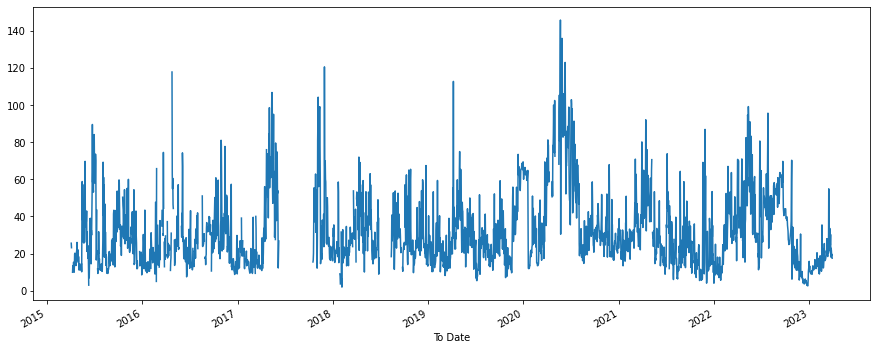

In [19]:
oz_data.plot(figsize=(15, 6))

In [20]:
import plotly.express as px
fig = px.line(oz_data, x=oz_data.index, y=oz_data.values, title='Ozone Concentration')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

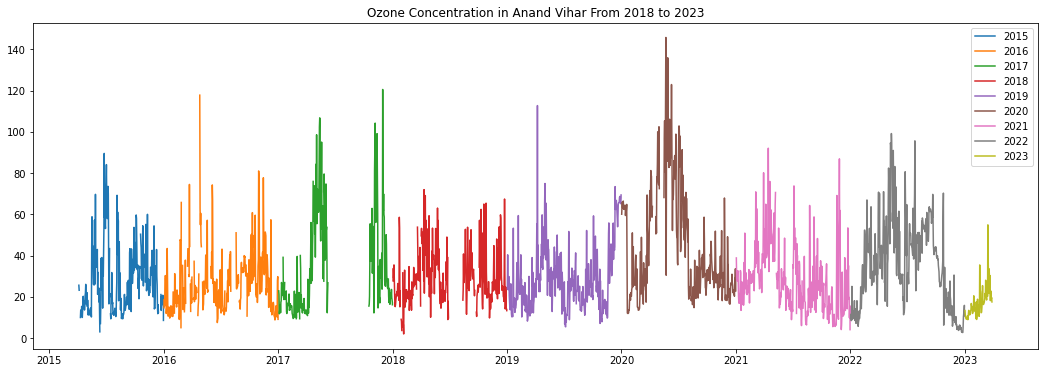

In [28]:

year = ['2015','2016','2017','2018','2019','2020','2021','2022','2023']
# all plots in one figure
plt.figure(figsize=(18,6))
for i in year:
    df_year = df.loc[i]
    plt.plot(df_year['Ozone'],label=i)
plt.legend(loc='best')
# increase the titlr size 
plt.title('Ozone Concentration in Anand Vihar From 2018 to 2023')
plt.show()

In [46]:
# i want to group by month
aq_df = df.copy()
aq_df.isna().sum() / len(aq_df) * 100

PM2.5      11.084746
PM10       12.576271
NO         12.440678
NO2        12.203390
NOx        15.830508
NH3        12.135593
SO2        11.627119
CO         12.745763
Ozone      11.525424
Benzene    14.576271
Toluene    14.576271
RH         10.915254
WD         10.881356
SR         12.542373
BP         11.288136
AT         12.305085
RF         99.084746
TOT-RF      0.000000
dtype: float64

In [47]:
aq_df.drop(['RF'], axis=1, inplace=True)
# ss.head()
aq_df['month'] = df.index.month
aq_df['year'] = df.index.year
aq_df['day'] = df.index.day
aq_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,,,
2015-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,2015,2
2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,2015,3
2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,2015,4
2015-04-05,53.96,166.93,18.27,55.11,70.93,25.78,30.99,1.61,25.63,2.04,10.27,59.87,131.07,256.38,740.0,23.28,0.0,4,2015,5
2015-04-06,100.82,260.41,15.91,50.65,62.23,32.94,47.61,1.42,23.20,4.39,10.60,69.64,124.15,174.72,740.0,20.74,0.0,4,2015,6


(2130, 20)


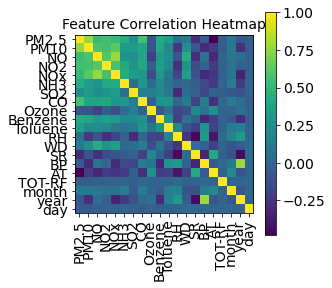

In [48]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

aq_df.dropna(inplace=True)
print(aq_df.shape)
show_heatmap(aq_df)

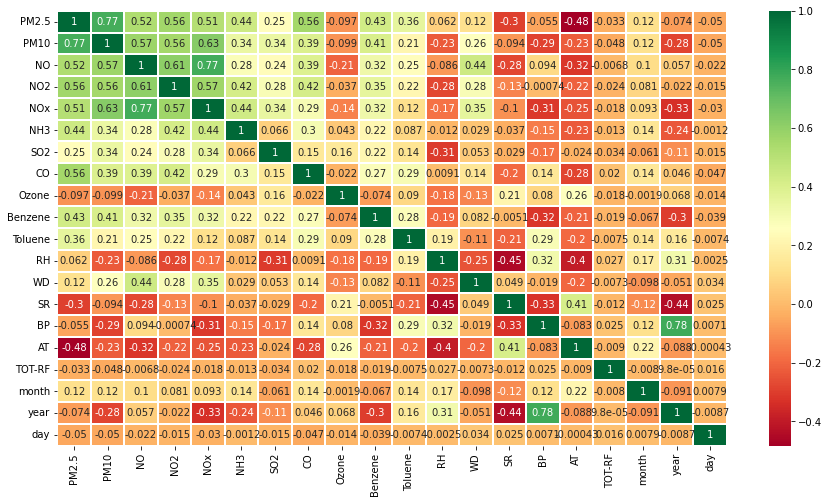

In [49]:
aq_df.dropna(inplace=True)
aq_corr = aq_df.corr(method='pearson')
g = sns.heatmap(aq_corr,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# LSTM Model Training for Ashok Vihar

In [50]:
# dropping the null values
aq_df.dropna(inplace=True)
aq_df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
SO2        0
CO         0
Ozone      0
Benzene    0
Toluene    0
RH         0
WD         0
SR         0
BP         0
AT         0
TOT-RF     0
month      0
year       0
day        0
dtype: int64

In [51]:
aq_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,,,
2015-04-05,53.96,166.93,18.27,55.11,70.93,25.78,30.99,1.61,25.63,2.04,10.27,59.87,131.07,256.38,740.0,23.28,0.0,4,2015,5
2015-04-06,100.82,260.41,15.91,50.65,62.23,32.94,47.61,1.42,23.20,4.39,10.60,69.64,124.15,174.72,740.0,20.74,0.0,4,2015,6
2015-04-10,82.52,479.57,26.66,79.01,86.82,19.11,16.86,1.56,9.99,3.11,11.00,31.22,264.40,199.36,740.0,14.01,0.0,4,2015,10
2015-04-11,115.82,448.17,27.35,77.16,88.63,21.82,11.77,1.77,13.59,3.18,9.82,36.19,256.39,219.13,740.0,29.82,0.0,4,2015,11
2015-04-12,199.85,646.03,18.52,85.30,93.57,33.95,28.85,1.95,13.31,5.33,16.28,36.17,160.64,195.06,740.0,30.07,0.0,4,2015,12


In [52]:
# define the train and test data
x_train = aq_df[:'2022-01-01']
y_train = x_train['Ozone']
x_test = aq_df['2022-01-01':]
y_test = x_test['Ozone']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1761, 20), (1761,), (369, 20), (369,))

In [53]:
# transforming and normalizing the data
train_norm = TsPreProcessing.Transform_Normalize(x_train['Ozone'])
test_norm = TsPreProcessing.Transform_Normalize(x_test['Ozone'])

[0.16439404]
[0.14748852]
[0.05558648]
[0.0806317]
[0.07868373]
Number of null values in norm =  1
[0.07165077]
[0.09187059]
[0.05962256]
[0.09342596]
[0.06449606]
Number of null values in norm =  1


In [54]:
print(train_norm.shape)
print(test_norm.shape)

(1760,)
(368,)


In [55]:
n_steps = 15 #number of steps to look back
X_split_train, y_split_train = TsPreProcessing.split_sequence(train_norm, n_steps)
for i in range(len(X_split_train)):
    print(X_split_train[i], y_split_train[i])
n_features = 1 #number of features (in this case it is just the number of columns in the dataframe)
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

[0.16439404 0.14748852 0.05558648 0.0806317  0.07868373 0.09308474
 0.07096146 0.05565605 0.0780576  0.12348685 0.12703492 0.08918881
 0.10094615 0.11075553 0.08070127] 0.09718936969528315
[0.14748852 0.05558648 0.0806317  0.07868373 0.09308474 0.07096146
 0.05565605 0.0780576  0.12348685 0.12703492 0.08918881 0.10094615
 0.11075553 0.08070127 0.09718937] 0.1296090162793933
[0.05558648 0.0806317  0.07868373 0.09308474 0.07096146 0.05565605
 0.0780576  0.12348685 0.12703492 0.08918881 0.10094615 0.11075553
 0.08070127 0.09718937 0.12960902] 0.13823570335327673
[0.0806317  0.07868373 0.09308474 0.07096146 0.05565605 0.0780576
 0.12348685 0.12703492 0.08918881 0.10094615 0.11075553 0.08070127
 0.09718937 0.12960902 0.1382357 ] 0.16738555725615692
[0.07868373 0.09308474 0.07096146 0.05565605 0.0780576  0.12348685
 0.12703492 0.08918881 0.10094615 0.11075553 0.08070127 0.09718937
 0.12960902 0.1382357  0.16738556] 0.13148740781967438
[0.09308474 0.07096146 0.05565605 0.0780576  0.12348685 0

In [56]:
X_split_test, y_split_test = TsPreProcessing.split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))


[0.07165077 0.09187059 0.05962256 0.09342596 0.06449606 0.09197428
 0.09933637 0.06957694 0.10638739 0.09187059 0.11893405 0.15989216
 0.0736209  0.05993364 0.08627126] 0.11893405226047282
[0.09187059 0.05962256 0.09342596 0.06449606 0.09197428 0.09933637
 0.06957694 0.10638739 0.09187059 0.11893405 0.15989216 0.0736209
 0.05993364 0.08627126 0.11893405] 0.045831605143094145
[0.05962256 0.09342596 0.06449606 0.09197428 0.09933637 0.06957694
 0.10638739 0.09187059 0.11893405 0.15989216 0.0736209  0.05993364
 0.08627126 0.11893405 0.04583161] 0.058793031936955634
[0.09342596 0.06449606 0.09197428 0.09933637 0.06957694 0.10638739
 0.09187059 0.11893405 0.15989216 0.0736209  0.05993364 0.08627126
 0.11893405 0.04583161 0.05879303] 0.07476150974699294
[0.06449606 0.09197428 0.09933637 0.06957694 0.10638739 0.09187059
 0.11893405 0.15989216 0.0736209  0.05993364 0.08627126 0.11893405
 0.04583161 0.05879303 0.07476151] 0.1594773952716715


In [57]:
# import the fucntion for Support folder from the same directory
from LSTM_Model import build_lstm_model
n_steps = 15
n_features = 1
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_hidden_layers = 2
num_units_hidden_layers = 32
activation_function = 'tanh'
dropout_rate = 0.2

model = build_lstm_model(input_shape, num_lstm_units, num_hidden_layers, num_units_hidden_layers, dropout_rate)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [58]:
#  fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)

Epoch 1/50
55/55 [==============================] - 2s 11ms/step - loss: 0.0169 - mae: 0.0966 - val_loss: 0.0223 - val_mae: 0.1061
Epoch 2/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0092 - mae: 0.0689 - val_loss: 0.0165 - val_mae: 0.0875
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0086 - mae: 0.0654 - val_loss: 0.0176 - val_mae: 0.0888
Epoch 4/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0081 - mae: 0.0636 - val_loss: 0.0248 - val_mae: 0.1097
Epoch 5/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0084 - mae: 0.0649 - val_loss: 0.0159 - val_mae: 0.0865
Epoch 6/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0073 - mae: 0.0609 - val_loss: 0.0160 - val_mae: 0.0849
Epoch 7/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0078 - mae: 0.0624 - val_loss: 0.0160 - val_mae: 0.0838
Epoch 8/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0076 - mae: 0

In [59]:
yhat = model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
r2 = r2_score(y_split_test, yhat)
print('R2: %.5f' % r2)

12/12 [==============================] - 0s 2ms/step
MSE: 0.01542
RMSE: 0.12418
R2: 0.66485


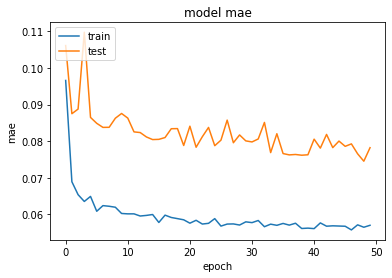

In [60]:
# summarize history for accuracy
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

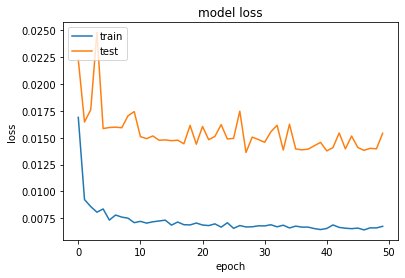

In [61]:
# Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

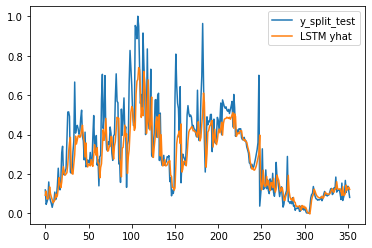

In [62]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(yhat, label='LSTM yhat')
plt.legend()

# Model Training for Ashok Vihar BiDirectional LSTM

In [63]:
from LSTM_Model import build_bidirectional_lstm_model
from keras.optimizers import Adam

n_steps = 10
n_features = 5
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_dense_units = 50
dense_activation_function = 'tanh'
optimizer = Adam(lr=0.001)

B_model = build_bidirectional_lstm_model(input_shape, num_lstm_units, num_dense_units, dense_activation_function, optimizer)

#  fit model
hist = B_model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)


Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



55/55 [==============================] - 3s 15ms/step - loss: 0.0129 - mae: 0.0847 - val_loss: 0.0199 - val_mae: 0.0979
Epoch 2/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0079 - mae: 0.0651 - val_loss: 0.0161 - val_mae: 0.0879
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0075 - mae: 0.0616 - val_loss: 0.0162 - val_mae: 0.0851
Epoch 4/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0071 - mae: 0.0600 - val_loss: 0.0166 - val_mae: 0.0842
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0071 - mae: 0.0601 - val_loss: 0.0154 - val_mae: 0.0820
Epoch 6/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0070 - mae: 0.0585 - val_loss: 0.0149 - val_mae: 0.0808
Epoch 7/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0068 - mae: 0.0576 - val_loss: 0.0150 - val_mae: 0.0791
Epoch 8/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0067 - mae: 0.0576 - v

In [64]:
B_yhat = B_model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, B_yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
# R2 score
r2 = r2_score(y_split_test, B_yhat)
print('R2: %.5f' % r2)

12/12 [==============================] - 0s 3ms/step
MSE: 0.01392
RMSE: 0.11800
R2: 0.69737


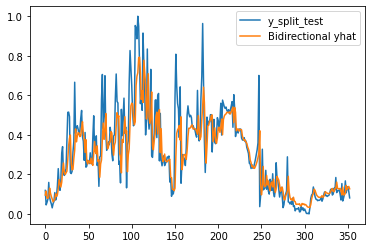

In [65]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(B_yhat, label='Bidirectional yhat')
plt.legend()

# Model Training for Ashok Vihar ML Models

In [66]:
Xml = aq_df.drop(['Ozone'], axis=1)
yml = aq_df['Ozone']
# to array

Xml = Xml.values
yml = yml.values

print(Xml)
print(yml)

[[5.3960e+01 1.6693e+02 1.8270e+01 ... 4.0000e+00 2.0150e+03 5.0000e+00]
 [1.0082e+02 2.6041e+02 1.5910e+01 ... 4.0000e+00 2.0150e+03 6.0000e+00]
 [8.2520e+01 4.7957e+02 2.6660e+01 ... 4.0000e+00 2.0150e+03 1.0000e+01]
 ...
 [4.7720e+01 2.3852e+02 5.9760e+01 ... 2.0000e+00 2.0230e+03 1.4000e+01]
 [8.2800e+01 2.3667e+02 8.7300e+01 ... 2.0000e+00 2.0230e+03 1.5000e+01]
 [1.0584e+02 2.9104e+02 1.2252e+02 ... 2.0000e+00 2.0230e+03 1.6000e+01]]
[25.63 23.2   9.99 ... 16.01 13.57 10.55]


In [67]:
from sklearn.model_selection import train_test_split
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xml, yml, test_size=0.3, random_state=0)

# MLR Multivariate Linear Regression Model Training for Ashok Vihar

MSE: 239.29467
RMSE: 15.46915
R2: 0.26656


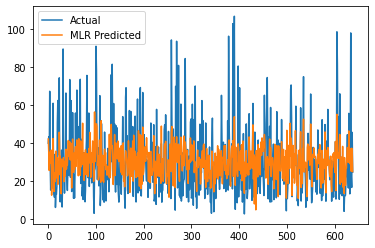

In [68]:
# write the function for the MLR model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_mlr_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the MLR model
mlr_model, mlr_yhat = build_mlr_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
plt.plot(y_test, label='Actual')
plt.plot(mlr_yhat, label='MLR Predicted')
plt.legend()

# Random Forest Model Training for Ashok Vihar

MSE: 140.93093
RMSE: 11.87143
R2: 0.56805


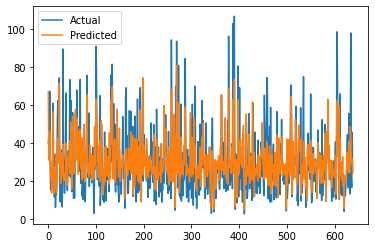

In [69]:

# write the function for the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the Random Forest model
rf_model, rf_yhat = build_rf_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
# plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual')
plt.plot(rf_yhat, label='Predicted')
plt.legend()
